In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from nltk import everygrams
from nltk.corpus import stopwords as sw
import math
from collections import Counter
import itertools
import re

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the datasets
resumeDf = pd.read_csv('resume_data.csv')
print ("Total Rows =", len(resumeDf))
print ("Available Columns =", list(resumeDf.columns))
resumeDf.head()

Total Rows = 14804
Available Columns = ['Resume_title', 'City', 'State', 'Description', 'work_experiences', 'Educations', 'Skills', 'Links', 'Certificates', 'Additional Information']


,Resume_title,City,State,Description,work_experiences,Educations,Skills,Links,Certificates,Additional Information
0,Java Developer,Tirur,Kerala,"To prove myself dedicated, worthy and energeti...","{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Bachelor of C...","['Java (Less than 1 year)', ' Jsp (Less than 1...",['https://www.linkedin.com/in/mohamed-rihan-k-...,"{0: [{'c_title:': 'Java Developer'}, {'c_durat...",\nTechnical Expertise \n• Operating Systems: W...
1,Software Developer,Bengaluru,Karnataka,Working as Software Developer at IngroInfo Sof...,"{0: [{'wtitle:': 'JAVA DEVELOPER'}, {'wcompany...",{0: [{'e_title:': 'MCA in Master of Computer A...,"['Programming Languages: Core Java', ' J2EE \n...","['http://github.com/NK-PATEL/Train_Project', '...",{},NONE
2,Java developer,Pune,Maharashtra,Looking for a challenging career which demands...,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Electrical En...","['ECLIPSE (1 year)', ' HIBERNATE', ' SPRING (L...",[],{},"\nTECHNICAL SKILLS \n \nFrameworks: Spring, Sp..."
3,Seeking innovative and challenging career assi...,Pune,Maharashtra,NONE,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': 'BE in Computer'}, {'e_schoo...","['GIT', ' Angular 7', ' MAVEN', ' Java', ' Jen...",[],{},NONE
4,NONE,Pune,Maharashtra,NONE,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...",{0: [{'e_title:': 'Bachelor of Engineering in ...,['Project: HR Payroll Systems Role: Java Devel...,[],{},NONE


In [5]:
# Preprocessing
resumeDf['State'] = resumeDf['State'].str.strip()
resumeDf['City'] = resumeDf['City'].str.strip()

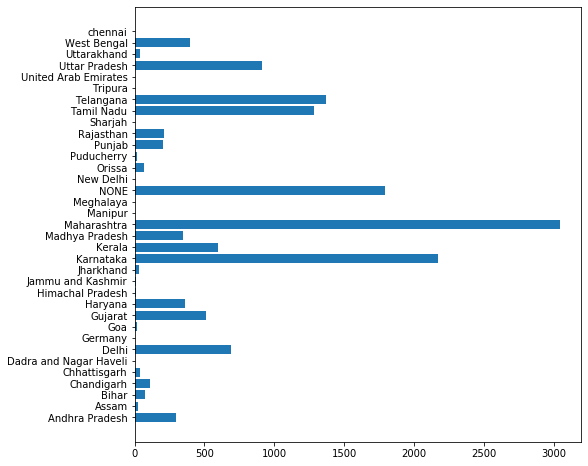

In [6]:
# Understanding judicial state distribution 
resumeDf_grouped_state = resumeDf.groupby('State').size()
all_states = list(resumeDf_grouped_state.index)
all_sizes = resumeDf_grouped_state.values

selected_states, selected_sizes = [], []
for row in zip(all_states, all_sizes):
    if row[-1] > 1 and len(row[0]) > 2:
        selected_states.append(row[0])
        selected_sizes.append(row[1])
        
plt.figure(figsize=(8, 8))
plt.barh(selected_states, selected_sizes)
plt.show()

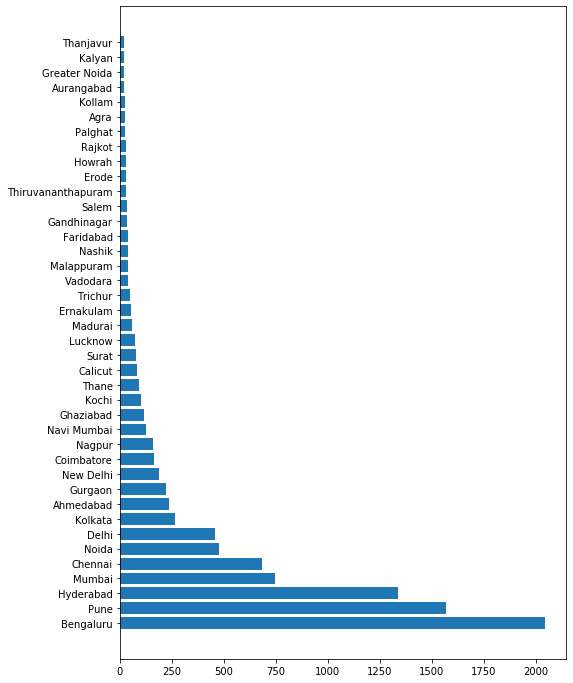

In [7]:
# Understanding City distribution for the largest 10 cities
MAXIMUM_STATE, MAXIMUM_CITIES = 10, 40
top_states = [item[0] for item in sorted(zip(selected_states, selected_sizes), key=lambda x: x[-1], reverse=True) if item[0] != 'NONE'][:MAXIMUM_STATE]
resumeDf_popular_states = resumeDf[resumeDf['State'].isin(top_states)]
resumeDf_popular_states_grouped = resumeDf_popular_states.groupby(['City', 'State']).size()
multi_indexes_grouped = resumeDf_popular_states_grouped.index
popular_cities, popular_city_size = [], []
for row in range(len(resumeDf_popular_states_grouped)):
    popular_cities.append(multi_indexes_grouped[row][0])
    popular_city_size.append(resumeDf_popular_states_grouped[row])
    
sorted_cities = sorted(zip(popular_cities, popular_city_size), key=lambda x: x[-1], reverse=True)
popular_cities, popular_city_size = [list(tup)[:MAXIMUM_CITIES] for tup in zip(*sorted_cities)]

plt.figure(figsize=(8, 12))
plt.barh(popular_cities, popular_city_size)
plt.show()

In [9]:
# Understanding most popular contents in title
other_corrections = {'developer': 'Developer', 'Jr.': 'Junior', 'Php': 'PHP', 
                    'php': 'PHP', 'mca': 'MCA', 'java': 'Java', 'Full Stack': 'FullStack', '1': 'one', '2': 'two', '3': 'three',
                    '4': 'four', '5': 'five', '6': 'six', '7': 'seven', '8': 'eight', '9': 'nine', '0': 'zero', 'Sr': 'Senior'}
custom_stopwords = ['NONE', 'I', 'Pvt', 'Ltd']
stopwords = list(set(sw.words('english') + custom_stopwords))
resume_titles = []
for line in list(resumeDf['Resume_title']):
    temp_list = []
    if str(type(line)) == "<class 'str'>" or not math.isnan(line):
        # Apply other corrections
        for correction in other_corrections.keys():
            line = line.replace(correction, other_corrections.get(correction))
        for word in line.split():
            if word not in stopwords:
                filtered_wd = re.sub('[^0-9a-zA-Z]+', ' ',  word.strip()).strip()
                if len(filtered_wd) == 0 or filtered_wd in stopwords:
                    continue 
                temp_list.append(filtered_wd.lower())
        if len(temp_list) > 0:
            resume_titles.append(temp_list)
            
resume_titles_flattened = list(itertools.chain(*resume_titles))
# Futher flatten resume titles
new_resume_titles_flattened = []
for row in resume_titles_flattened:
    if len(row.split()) == 1:
        new_resume_titles_flattened.append(row.lower())
    else:
        for item in row.split():
            filtered_wd = re.sub('[^0-9a-zA-Z]+', ' ',  item.strip()).strip()
            if len(filtered_wd) == 0 or filtered_wd in stopwords:
                continue
            
            for correction in other_corrections.keys():
                    if filtered_wd == correction:
                        filtered_wd = filtered_wd.replace(correction, other_corrections.get(correction))
                        break
            new_resume_titles_flattened.append(item.lower())

In [10]:
# Creating N-grams
lower_ngrams, upper_ngram = 2, 5
n_trigrams = dict(Counter(list(everygrams(new_resume_titles_flattened, lower_ngrams, upper_ngram))))
n_trigrams_tup = [(n_trigrams.get(key), key) for key in n_trigrams.keys()]
n_trigrams_tup.sort(key=lambda item: item[0], reverse=True)
print ("Total N-Gram Tuples =", len(n_trigrams_tup))
# Printing Top Tuples
MAX_TUPLES = 500
n_trigrams_tup[:MAX_TUPLES]

Total N-Gram Tuples = 90994


[(648, ('software', 'developer')),
 (581, ('php', 'developer')),
 (421, ('web', 'developer')),
 (385, ('python', 'developer')),
 (384, ('java', 'developer')),
 (374, ('developer', 'php')),
 (351, ('machine', 'learning')),
 (301, ('developer', 'php', 'developer')),
 (298, ('developer', 'software')),
 (272, ('years', 'experience')),
 (232, ('developer', 'software', 'developer')),
 (214, ('developer', 'python')),
 (202, ('php', 'developer', 'php')),
 (201, ('software', 'engineer')),
 (178, ('data', 'scientist')),
 (177, ('developer', 'web')),
 (161, ('php', 'developer', 'php', 'developer')),
 (151, ('android', 'developer')),
 (149, ('ui', 'developer')),
 (148, ('developer', 'web', 'developer')),
 (146, ('developer', 'java')),
 (141, ('data', 'science')),
 (134, ('developer', 'python', 'developer')),
 (128, ('developer', 'java', 'developer')),
 (119, ('looking', 'job')),
 (116, ('deep', 'learning')),
 (110, ('fullstack', 'developer')),
 (108, ('developer', 'php', 'developer', 'php')),
 (10

In [129]:
# Understanding most popular contents in description
custom_stopwords = ['NONE', 'to', 'using', 'i', 'pvt', 'ltd', 'it', 'use', 'having', 'along', 'would', 'etc', 'gives']
stopwords = list(set(sw.words('english') + custom_stopwords))
resume_descr = []
for line in list(resumeDf['Description']):
    temp_list = []
    if str(type(line)) == "<class 'str'>" or not math.isnan(line):
        # Apply other corrections
        for correction in other_corrections.keys():
            line = line.replace(correction, other_corrections.get(correction))
        for word in line.split():
            if word not in stopwords:
                filtered_wd = re.sub('[^0-9a-zA-Z]+', ' ',  word.strip()).strip()
                if len(filtered_wd) == 0 or filtered_wd in stopwords:
                    continue 
                if len(filtered_wd) > 1:
                    temp_list.append(filtered_wd.lower())
        if len(temp_list) > 0:
            resume_descr.append(temp_list)
            
resume_descr_flattened = list(itertools.chain(*resume_descr))
# Futher flatten resume titles
new_resume_descr_flattened = []
for row in resume_descr_flattened:
    if len(row.split()) == 1:
        new_resume_descr_flattened.append(row.lower())
    else:
        for item in row.split():
            filtered_wd = re.sub('[^0-9a-zA-Z]+', ' ',  item.strip()).strip()
            if len(filtered_wd) == 0 or filtered_wd in stopwords:
                continue
            
            for correction in other_corrections.keys():
                    if filtered_wd == correction:
                        filtered_wd = filtered_wd.replace(correction, other_corrections.get(correction))
                        break
            new_resume_descr_flattened.append(item.lower())

In [131]:
# Creating N-grams 
lower_ngrams, upper_ngram = 2, 5
n_trigrams = dict(Counter(list(everygrams(new_resume_descr_flattened, lower_ngrams, upper_ngram))))
n_trigrams_tup = [(n_trigrams.get(key), key) for key in n_trigrams.keys()]
n_trigrams_tup.sort(key=lambda item: item[0], reverse=True)
print ("Total N-Gram Tuples =", len(n_trigrams_tup))
# Printing Top Tuples
MAX_TUPLES = 750
n_trigrams_tup[:MAX_TUPLES]

Total N-Gram Tuples = 1192755


[(2198, ('years', 'experience')),
 (1837, ('machine', 'learning')),
 (1355, ('hands', 'experience')),
 (1211, ('good', 'knowledge')),
 (1106, ('software', 'development')),
 (854, ('to', 'work')),
 (822, ('design', 'development')),
 (809, ('sql', 'server')),
 (756, ('data', 'science')),
 (734, ('problem', 'solving')),
 (708, ('experience', 'working')),
 (696, ('deep', 'learning')),
 (688, ('growth', 'organization')),
 (672, ('five', 'years')),
 (671, ('two', 'years')),
 (663, ('team', 'player')),
 (647, ('html', 'css')),
 (615, ('good', 'experience')),
 (615, ('big', 'data')),
 (612, ('extensive', 'experience')),
 (612, ('three', 'years')),
 (600, ('web', 'services')),
 (591, ('experience', 'developing')),
 (586, ('new', 'technologies')),
 (582, ('life', 'cycle')),
 (558, ('application', 'development')),
 (554, ('pl', 'sql')),
 (530, ('experience', 'data')),
 (524, ('communication', 'skills')),
 (516, ('data', 'warehouse')),
 (507, ('knowledge', 'skills')),
 (506, ('analysis', 'design')

In [139]:
# Understanding most popular contents in Additional Information
custom_stopwords = ['NONE', 'to', 'using', 'i', 'pvt', 'ltd', 'it', 'use', 'having', 'along', 'would', 'etc', 'gives']
stopwords = list(set(sw.words('english') + custom_stopwords))
resume_add_info = []
for line in list(resumeDf['Additional Information']):
    temp_list = []
    if str(type(line)) == "<class 'str'>" or not math.isnan(line):
        # Apply other corrections
        for correction in other_corrections.keys():
            line = line.replace(correction, other_corrections.get(correction))
        for word in line.split():
            if word not in stopwords:
                filtered_wd = re.sub('[^0-9a-zA-Z]+', ' ',  word.strip()).strip()
                if len(filtered_wd) == 0 or filtered_wd in stopwords:
                    continue 
                if len(filtered_wd) > 1:
                    temp_list.append(filtered_wd.lower())
        if len(temp_list) > 0:
            resume_add_info.append(temp_list)
            
resume_add_info_flattened = list(itertools.chain(*resume_add_info))
# Futher flatten resume titles
new_resume_add_info_flattened = []
for row in resume_add_info_flattened:
    if len(row.split()) == 1:
        new_resume_add_info_flattened.append(row.lower())
    else:
        for item in row.split():
            filtered_wd = re.sub('[^0-9a-zA-Z]+', ' ',  item.strip()).strip()
            if len(filtered_wd) == 0 or filtered_wd in stopwords:
                continue
            
            for correction in other_corrections.keys():
                    if filtered_wd == correction:
                        filtered_wd = filtered_wd.replace(correction, other_corrections.get(correction))
                        break
            new_resume_add_info_flattened.append(item.lower())

In [140]:
# Creating N-grams
lower_ngrams, upper_ngram = 2, 7
n_trigrams = dict(Counter(list(everygrams(new_resume_add_info_flattened, lower_ngrams, upper_ngram))))
n_trigrams_tup = [(n_trigrams.get(key), key) for key in n_trigrams.keys()]
n_trigrams_tup.sort(key=lambda item: item[0], reverse=True)
print ("Total N-Gram Tuples =", len(n_trigrams_tup))
# Printing Top Tuples
MAX_TUPLES = 750
n_trigrams_tup[:MAX_TUPLES]

Total N-Gram Tuples = 1983653


[(3350, ('technical', 'skills')),
 (2472, ('html', 'css')),
 (1705, ('operating', 'systems')),
 (1670, ('machine', 'learning')),
 (1581, ('programming', 'languages')),
 (1435, ('operating', 'system')),
 (1210, ('systems', 'windows')),
 (1192, ('sql', 'server')),
 (1187, ('operating', 'systems', 'windows')),
 (1092, ('skills', 'programming')),
 (1091, ('web', 'technologies')),
 (954, ('system', 'windows')),
 (933, ('operating', 'system', 'windows')),
 (908, ('database', 'mysql')),
 (903, ('core', 'java')),
 (850, ('languages', 'java')),
 (827, ('visual', 'studio')),
 (822, ('ms', 'office')),
 (810, ('css', 'javascript')),
 (776, ('technical', 'skills', 'programming')),
 (770, ('deep', 'learning')),
 (746, ('javascript', 'jquery')),
 (726, ('html', 'css', 'javascript')),
 (722, ('windows', 'linux')),
 (721, ('technologies', 'html')),
 (718, ('skills', 'programming', 'languages')),
 (693, ('windows', 'xp')),
 (693, ('skills', 'languages')),
 (621, ('windows', 'seven')),
 (615, ('web', 'te

In [17]:
# Fetching the Educational Details
continued_for = 0
common_key = []
degrees = []
others = []
pre_common_replacement = {'Masters of':'Master of', 'Bachelors of': 'Bachelor of', 'Master s in': 'Master of', 'Master in': 'Master of', 'Master s': 'Master', 
                          'Bachelor s in': 'Bachelor of', 'Bachelor in': 'Bachelor of', 'Bachelor s': 'Bachelor'
                         }

common_replacement = {'BE': 'Bachelor of Engineering', 'B E': 'Bachelor of Engineering', 'MCA': 'Master of Computer Application',
                      'ME': 'Master of Engineering', 'M E': 'Master of Engineering',
                      'CSE': 'Computer Science Engineering', 'CS': 'Computer Science Engineering',
                      'B A': 'Bachelor of Arts', 'BA': 'Bachelor of Arts',
                      'BCS': 'Bachelor of Computer Science', 'B C S': 'Bachelor of Computer Science',
                      'M C A': 'Master of Computer Application', 'B Tech': 'Bachelor of Technology', 'B C A': 'Bachelor of Computer Application',
                      'BTech': 'Bachelor of Technology', 'BCA': 'Bachelor of Computer Application', 'B Sc': 'Bachelor of Science',
                      'B S': 'Bachelor of Science', 'BS': 'Bachelor of Science',
                      'BBA': 'Bachelor of Business Application', 'B B A': 'Bachelor of Business Application',
                      'B S C': 'Bachelor of Science', 'SSLC': 'Class X', 'S S L C': 'Class X', 'AISSE': 'Class X',
                      'MS': 'Master of Science', 'M S': 'Master of Science', 'PhD': 'Doctoral', 'P h D': 'Doctoral',
                      'M Sc': 'Master of Science', 'Bcom': 'Bachelor of Commerce', 'B com': 'Bachelor of Commerce',
                     'BSc': 'Bachelor of Science', 'MSc': 'Master of Science', 'MBA': 'Master of Business Administration',
                      'M B A': 'Master of Business Administration', 'M Tech': 'Master of Technology', 'MTech': 'Master of Technology',
                     'M Sc': 'Master of Science', 'S S C': 'Class X', 'SSC': 'Class X', 'HSC': 'Class XII', 
                      'PG': 'Post Graduate', 'UG': 'Under Graduate',
                     'S S C': 'Class X', 'H S C': 'Class XII', 'C B S E': 'Class XII', 'CBSE': 'Class XII', 'Higher Secondary': 'Class XII',
                     '10th': 'Class X', '12th': 'Class XII', 'BBM': 'Bachelor of Business Management', 'B B M': 'Bachelor of Business Management',
                     'HIGH SCHOOL': 'Class XII', 'Plus Two': 'Class XII', 'I C S E': 'Class X', 'Secondary School Examination': 'Class X'}

common_replacement_vals = list(set([common_replacement.get(key).lower() for key in common_replacement.keys()]))
unique_identifiers = {'B': ''}

for row in resumeDf['Educations']:
    if str(type(row)) != "<class 'float'>":
        try:
            vals = eval(row)
            for idx in range(len(vals)):
                education_row = vals[idx][0]
                key = list(education_row.keys())[0]
                degree_val = education_row.get(key)
                degree_val = re.sub('[^0-9a-zA-Z]+', ' ',  degree_val.strip()).strip()
                
                if degree_val.lower() == 'none' or len(degree_val) < 2:
                    continue
                    
                elif degree_val == 'Bachelor':
                    degrees.append('Ordinary Bachelor')
                    continue
                    
                elif degree_val == 'Master':
                    degrees.append('Ordinary Master')
                    continue
                    
                else:
                    
                    # Pre-common replacement
                    for precommon in pre_common_replacement.keys():
                        if degree_val.find(precommon) != -1:
                            degree_val = degree_val.replace(precommon, pre_common_replacement.get(precommon))
                            break

                    flag=False;
                    for common_vals in common_replacement_vals:
                        if degree_val.lower().find(common_vals) != -1:
                            degrees.append(common_vals)
                            flag = True;
                            break

                    if not flag:
                        for key in common_replacement.keys():
                            if key.lower() in degree_val.lower():
                                degrees.append(common_replacement.get(key).lower())
                                flag = True;
                                break

                    if not flag:
                        if degree_val == 'Bachelor':
                            degrees.append('Ordinary Bachelor')
                        elif degree_val == 'Master':
                            degrees.append('Ordinary Master')
                            
                        else:
                            degrees.append(degree_val)
                            others.append(degree_val)
        except:
            continue

In [18]:
# Printing the most common degrees
degree_map = dict(Counter(degrees))
degree_map_tup = [(degree_map.get(key), key) for key in degree_map.keys()]
degree_map_tup.sort(key=lambda item: item[0], reverse=True)
degree_map_tup

[(3167, 'bachelor of engineering'),
 (2993, 'class x'),
 (2652, 'bachelor of technology'),
 (2128, 'class xii'),
 (1995, 'computer science engineering'),
 (1855, 'bachelor of science'),
 (1848, 'bachelor of arts'),
 (1793, 'master of computer application'),
 (1273, 'bachelor of computer application'),
 (1124, 'master of engineering'),
 (626, 'bachelor of computer science'),
 (529, 'master of science'),
 (324, 'bachelor of commerce'),
 (318, 'master of technology'),
 (269, 'post graduate'),
 (201, 'Ordinary Master'),
 (143, 'Education'),
 (126, 'Diploma'),
 (94, 'Master of Computer Science'),
 (62, 'Certificate'),
 (62, 'Diploma in Computer Engineering'),
 (47, 'Diploma in Information Technology'),
 (46, 'Ordinary Bachelor'),
 (46, 'Diploma in Computer Science'),
 (46, 'Secondary School Certificate'),
 (45, 'Master of Computer science'),
 (35, 'Computer Science'),
 (31, 'Certification'),
 (28, 'master of business administration'),
 (27, 'Secondary Education'),
 (27, 'education'),
 (24, 

In [111]:
# Capturing the skillsets
all_skillsets = []
map_skillset_experiences = {}
# Mapping Order = ['Less than 1 years', '1 year', '2 years', '3 ']
for skills in resumeDf['Skills']:
    if str(type(skills)) == "<class 'float'>":
        continue
    try:
        for skill in eval(skills):
            skillset = ''
            if skill.find('(') != -1:
                skillset = skill[:skill.find('(')].strip().upper()
                start_idx, end_idx = skill.find('('), skill.find(')')
                exp = skill[start_idx+1:end_idx].replace("\n", "")
                if 'year' in exp.lower():
                    s_idx = exp.find('year')
                    numeric_year = exp[:s_idx].strip()
                    if map_skillset_experiences.get(skillset) is None:
                        map_skillset_experiences[skillset] = {numeric_year: 1}
                        #map_skillset_experiences[skillset][numeric_year] = 1
                    elif map_skillset_experiences.get(skillset).get(numeric_year) is None:
                        map_skillset_experiences[skillset].update({numeric_year:1})
                        #map_skillset_experiences[skillset][numeric_year] = 1
                    else:
                        #print ("I came tp 3") 
                        map_skillset_experiences[skillset][numeric_year] = map_skillset_experiences.get(skillset).get(numeric_year) + 1
            else:
                skillset = skill.strip().upper()
            all_skillsets.append(skillset)
    except:
        #print (ex)
        continue
        
fav_skillsets = dict(Counter(all_skillsets))
fav_skillsets_tup = [(fav_skillsets.get(key), key) for key in fav_skillsets.keys()]
fav_skillsets_tup.sort(key=lambda item: item[0], reverse=True)

In [112]:
# Printing the most observed skillsets
fav_skillsets_tup

[(4195, 'HTML'),
 (4127, 'JAVASCRIPT'),
 (3386, 'CSS'),
 (3063, 'PYTHON'),
 (2717, 'JAVA'),
 (2647, 'PHP'),
 (2092, 'C++'),
 (2021, 'BOOTSTRAP'),
 (2014, 'MYSQL'),
 (1873, 'NONE'),
 (1700, 'JQUERY'),
 (1604, 'SQL'),
 (1186, 'HTML5'),
 (1064, 'DJANGO'),
 (1062, 'C'),
 (985, 'MACHINE LEARNING'),
 (978, 'GIT'),
 (924, 'DATABASE'),
 (802, 'AJAX'),
 (704, 'LINUX'),
 (674, 'MONGODB'),
 (600, 'CODEIGNITER'),
 (600, 'ANDROID'),
 (576, 'NODEJS'),
 (570, 'C#'),
 (552, 'WORDPRESS'),
 (529, 'CORE JAVA'),
 (512, 'DEEP LEARNING'),
 (500, 'SPRING'),
 (485, 'HIBERNATE'),
 (481, 'ECLIPSE'),
 (468, 'ORACLE'),
 (453, 'ANGULARJS'),
 (452, 'LARAVEL'),
 (427, 'JSON'),
 (393, 'JSP'),
 (381, 'XML'),
 (379, 'KERAS'),
 (372, 'VISUAL STUDIO'),
 (365, ''),
 (354, 'SQL SERVER'),
 (352, 'TENSORFLOW'),
 (349, 'CSS3'),
 (335, 'ANGULAR'),
 (328, 'J2EE'),
 (324, 'DATA SCIENCE'),
 (309, 'REACTJS'),
 (299, '.NET'),
 (298, 'EXCEL'),
 (298, 'API'),
 (297, 'ASP.NET'),
 (296, 'NUMPY'),
 (288, 'AWS'),
 (286, 'PANDAS'),
 (266,

In [119]:
# Printing the experience level across top-200 most observed skillsets
print ("Skillset", "\t", "Experiences")
for _, skill in fav_skillsets_tup[:200]:
    print (skill, '\t', map_skillset_experiences.get(skill))

Skillset 	 Experiences
HTML 	 {'Less than 1': 555, '1': 127, '3': 38, '4': 34, '2': 117, '7': 7, '10+': 6, '9': 4, '5': 10, '6': 5, '8': 3, '8+': 1}
JAVASCRIPT 	 {'Less than 1': 262, '2': 188, '3': 82, '1': 210, '4': 28, '5': 15, '9': 3, '10+': 11, '6': 7, '8': 14, '7': 4, '8+': 1}
CSS 	 {'Less than 1': 623, '2': 160, '1': 154, '3': 57, '4': 33, '7': 6, '5': 15, '9': 1, '10+': 3, '8': 6, '6': 3, '8+': 1}
PYTHON 	 {'Less than 1': 241, '1': 194, '3': 85, '4': 23, '2': 198, '10+': 13, '9': 6, '7': 3, '5': 12, '6': 7, '8': 1}
JAVA 	 {'Less than 1': 427, '1': 127, '3': 47, '2': 96, '4': 14, '9': 4, '5': 12, '10+': 15, '7': 4, '6': 9, '8': 5}
PHP 	 {'2': 101, '1': 149, 'Less than 1': 193, '4': 34, '3': 89, '5': 10, '10+': 5, '9': 5, '7': 7, '8': 6, '6': 2, '8+': 1}
C++ 	 {'Less than 1': 446, '2': 30, '1': 48, '4': 17, '10+': 7, '5': 5, '3': 16, '8': 3}
BOOTSTRAP 	 {'Less than 1': 291, '2': 92, '1': 110, '4': 20, '3': 18, '5': 3, '6': 2, '7': 3, '8': 1}
MYSQL 	 {'2': 115, 'Less than 1': 147, 

SCIPY 	 {'Less than 1': 7, '2': 3, '1': 1}
NEURAL NETWORKS 	 {'1': 5, '3': 2, '4': 1, 'Less than 1': 2}
OPERATING SYSTEMS 	 None
VISUAL STUDIO CODE 	 {'Less than 1': 2, '3': 1, '2': 1}
MS ACCESS 	 {'Less than 1': 4}
ADO.NET 	 {'Less than 1': 13, '2': 1, '1': 4}
FRONT-END 	 {'Less than 1': 4, '1': 1, '2': 1}
HBASE 	 None
SOAP 	 {'8': 1}
DATA STRUCTURES 	 {'Less than 1': 21, '2': 1}
OOPS 	 {'3': 3, '2': 2}
PHP DEVELOPER 	 {'1': 4, '2': 4}
RANDOM FOREST 	 {'1': 1}
ADVANCE JAVA 	 {'2': 6, 'Less than 1': 3, '1': 1}
ORACLE PL/SQL 	 {'2': 2, '5': 1, '10+': 6, 'Less than 1': 9, '1': 1, '6': 1, '3': 4, '4': 1}
MANUAL TESTING 	 {'3': 1, '5': 1, '4': 1, '6': 1, 'Less than 1': 1}
MICROSERVICES 	 {'2': 5, 'Less than 1': 5, '4': 5, '5': 1, '7': 1, '1': 1}
AGILE 	 {'2': 4, '5': 3}
NATURAL 	 None
CNN 	 {'Less than 1': 6}
POSTMAN 	 {'Less than 1': 2, '1': 4}
PROBLEM SOLVING 	 {'Less than 1': 12, '10+': 1, '3': 1}
SQL DBA 	 {'3': 1, '2': 5, 'Less than 1': 2, '1': 2}
RNN 	 {'Less than 1': 6}
